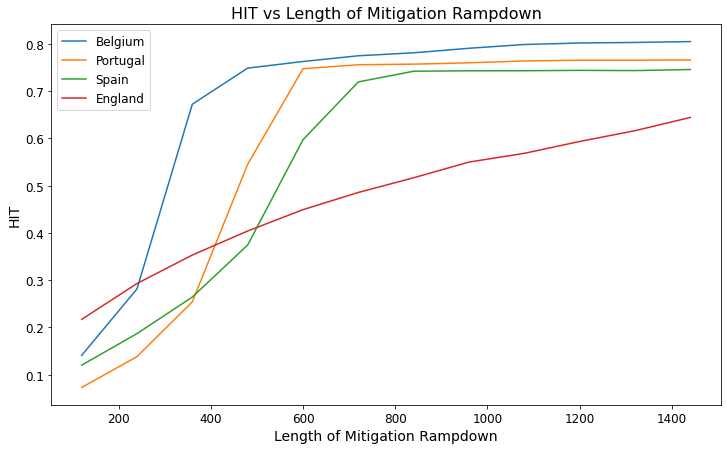

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
p=["B","P","S","E"]
dictc = {
    "B": "Belgium",
    "P": "Portugal",
    "S": "Spain",
    "E": "England"
}
lags={"B": 1, "P": 3, "S": 8,"E": 29}
hits=[[]]
hitsci1=[[]]
hitsci2=[[]]
logls = [[]]
for country in p:
    paths=[]
    for i in range(12):
        paths.append(country+"_"+str((i+1)*120)+".o")
    data=[[]]
    dataci1=[[]]
    dataci2=[[]]
    for x in paths:
        q=[]
        ci1=[]
        ci2=[]
        with open(x, 'r') as f:
            for line in f:
                if 'LogL: ' in line:
                    q.append(line[13:23])
                if 'p:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if country == p[0] or country == p[1]:
                    if 'inidist: ' in line:
                        q.append(line[21:27])
                else:
                    if 'inidist: ' in line:
                        q.append(line[22:29])                    
                if 'R0_1' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'CV_1:' in line:
                    q.append(line[21:27])
                    ci1.append(line[14:20])
                    ci2.append(line[28:34])
                if 'lag_1:' in line:
                    q.append(lags[country])
        data.append(q)
        dataci1.append(ci1)
        dataci2.append(ci2)
    data.pop(0)
    dataci1.pop(0)
    dataci2.pop(0)

    logl=[]
    hit=[]
    hitci1=[]
    hitci2=[]
    for d in data:
        hit.append(1-(1/float(d[3]))**(1/(1+(float(d[4])**2))))
    for e in dataci1:
        hitci1.append(1-(1/float(e[1]))**(1/(1+(float(e[2])**2))))
    for f in dataci2:
        hitci2.append(1-(1/float(f[1]))**(1/(1+(float(f[2])**2))))
    hits.append(hit)
    hitsci1.append(hitci1)
    hitsci2.append(hitci2)
    tspan=[]
    for i in range(12):
        tspan.append((i+1)*120)
    for d in data:
        logl.append(float(d[0]))
    logls.append(logl)
    f = list(map(list, zip(*data)))
    df = pd.DataFrame()
    df["Num Days at Max Social Distancing"] = tspan
    df["Log likelihood"] = f[0]
    df["dmax"] = f[1]
    df["inidist"] = f[2]
    df["R0"] = f[3]
    df["CV"] = f[4]
    df["lag"] = f[5]
    df.to_csv(r"C:\Users\pppot\Documents\projects\drampdown\results\\"  + dictc[country] + "_Estimated_Parameters" + ".csv", index=False)
logls.pop(0)
hits.pop(0)
hitsci1.pop(0)
hitsci2.pop(0)
tspan=[]
for i in range(12):
    tspan.append((i+1)*120)
plt.figure(figsize=(12,7))
h1,=plt.plot(tspan,hits[0], label = "Belgium")
h2,=plt.plot(tspan,hits[1], label = "Portugal")
h3,=plt.plot(tspan,hits[2], label = "Spain")
h4,=plt.plot(tspan,hits[3], label = "England")
# plt.plot(tspan,hitsci1[0], color= "whitesmoke")
# plt.plot(tspan,hitsci1[1], color= "whitesmoke")
# plt.plot(tspan,hitsci1[2], color= "whitesmoke")
# plt.plot(tspan,hitsci1[3], color= "whitesmoke")
# plt.plot(tspan,hitsci2[0], color= "whitesmoke")
# plt.plot(tspan,hitsci2[1], color= "whitesmoke")
# plt.plot(tspan,hitsci2[2], color= "whitesmoke")
# plt.plot(tspan,hitsci2[3], color= "whitesmoke")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Length of Mitigation Rampdown', fontsize=14)
plt.ylabel('HIT', fontsize=14)
plt.legend([h1,h2,h3,h4], ["Belgium","Portugal","Spain","England"], fontsize=12)
plt.title("HIT vs Length of Mitigation Rampdown", fontsize = 16)
plt.show()

In [5]:
import pandas as pd

Bdat = pd.DataFrame()
Bdat["Num Days SD Rampdown"] = tspan
Bdat["Min CI"] = hitsci2[0]
Bdat["HIT Estimate"] = hits[0]
Bdat["Max CI"] = hitsci1[0]
Pdat = pd.DataFrame()
Pdat["Num Days SD Rampdown"] = tspan
Pdat["Min CI"] = hitsci2[1]
Pdat["HIT Estimate"] = hits[1]
Pdat["Max CI"] = hitsci1[1]
Sdat = pd.DataFrame()
Sdat["Num Days SD Rampdown"] = tspan
Sdat["Min CI"] = hitsci2[2]
Sdat["HIT Estimate"] = hits[2]
Sdat["Max CI"] = hitsci1[2]
Edat = pd.DataFrame()
Edat["Num Days SD Rampdown"] = tspan
Edat["Min CI"] = hitsci2[3]
Edat["HIT Estimate"] = hits[3]
Edat["Max CI"] = hitsci1[3]

In [6]:
Bdat.to_csv(r'C:\Users\pppot\Documents\projects\drampdown\BelgiumHITs.csv', index=False)
Pdat.to_csv(r'C:\Users\pppot\Documents\projects\drampdown\PortugalHITs.csv', index=False)
Sdat.to_csv(r'C:\Users\pppot\Documents\projects\drampdown\SpainHITs.csv', index=False)
Edat.to_csv(r'C:\Users\pppot\Documents\projects\drampdown\EnglandHITs.csv', index=False)